In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
np.random.seed(1)

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

from anchor import utils

In [33]:
dataset_folder = 'Datasets/'
dataset = utils.load_dataset('mortality', discretize=False, balance=True, dataset_folder=dataset_folder)

In [10]:
a

array([0., 1.])

In [15]:
np.unique(msk).shape

(370,)

In [23]:
dataset_folder = 'Datasets/'
dataset = utils.load_dataset('mortality', discretize=False, balance=True, dataset_folder=dataset_folder)
a = np.unique(dataset.train[:,12])
# dataset.train[:,12] = a[1]
# dataset.ori_train[:,12] = 'Yes'
msk = np.where(dataset.labels_train == 1)[0]
msk = np.random.choice(msk,int(msk.shape[0]*0.85), replace = False)
dataset.train[msk,12] = a[0]
msk = np.where(dataset.labels_train == 0)[0]
msk = np.random.choice(msk,int(msk.shape[0]*0.80), replace = False)
dataset.train[msk,12] = a[1]
dataset.ori_train[msk,12] = 'No'

dataset.test[:,12] = a[1]
dataset.ori_test[:,12] = 'Yes'
msk = np.where(dataset.labels_test == 1)[0]
msk = np.random.choice(msk,int(msk.shape[0]*0.85), replace = False)
dataset.test[msk,12] = a[0]
dataset.ori_test[msk,12] = 'No'

In [17]:
a_dict = {'ano' : range(14),
'alime' : [0,3,5,2,12,1,4,6,7,8,9,10,11,13],
'aanchor' : [3,0,12,6,5,4,2,8,11,9,10,1,13,7],
'ashap' : [0,3,12,5,6,4,2,10,11,8,1,9,7,13]}
b_dict = {'bno' : range(14),
'blime' : [12,0,3,5,2,4,11,6,9,13,10,7,1,8],
'banchor' : [12,0,1,2,3,4,5,6,7,8,9,10,11,13],
'bshap' : [12,0,1,2,3,4,5,6,7,8,9,10,11,13]}

In [18]:
dead_idx = np.where(dataset.labels_train==1)[0]
not_idx = np.where(dataset.labels_train==0)[0]

In [29]:
np.unique(dataset.train[dead_idx,i]).shape

(2,)

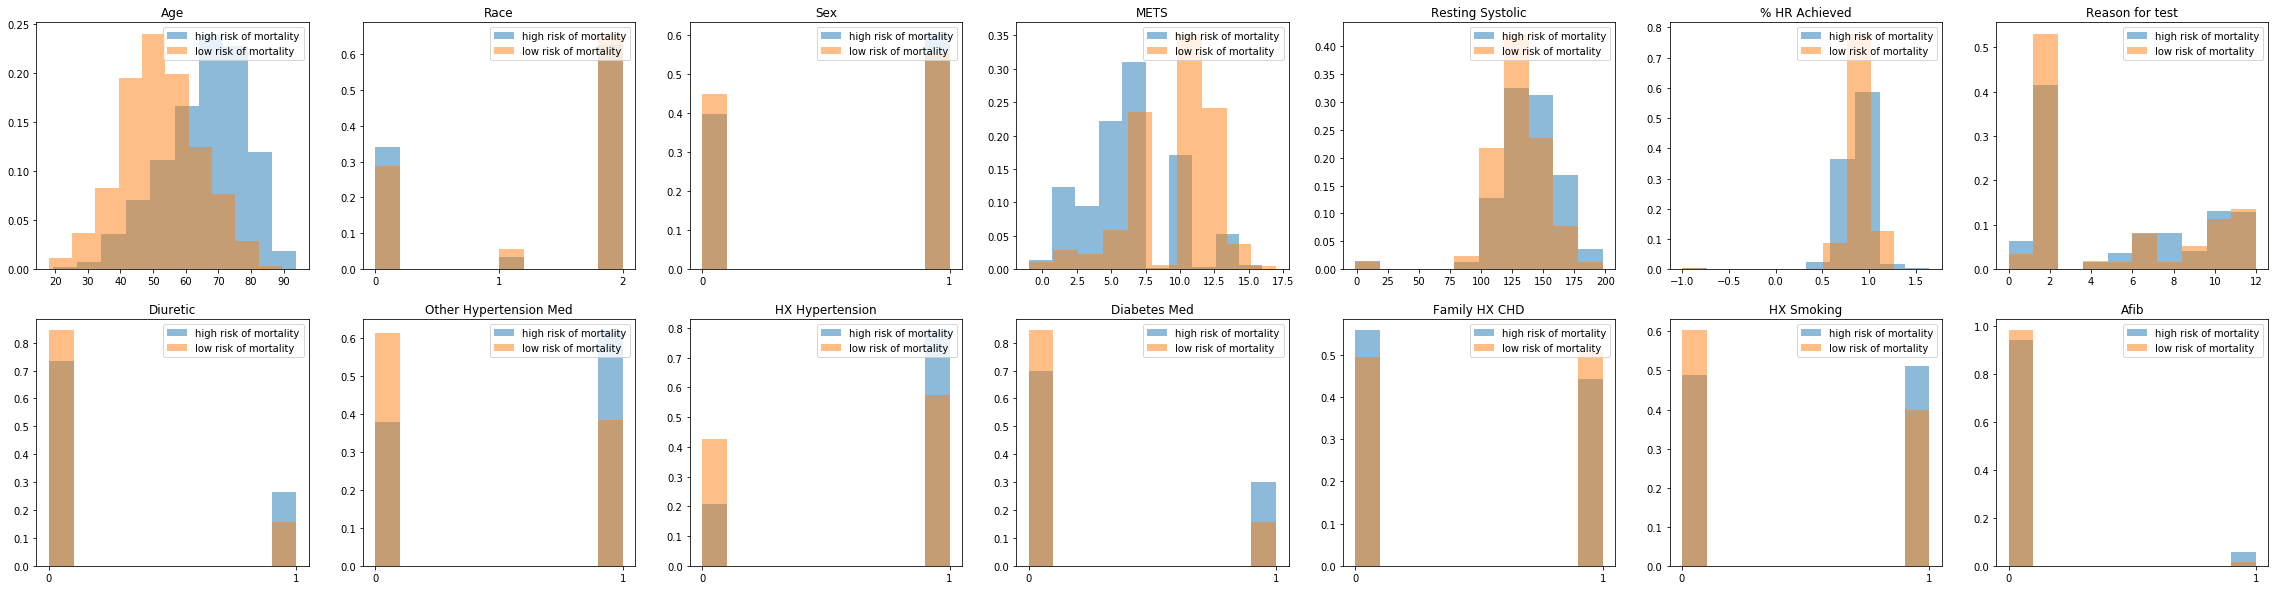

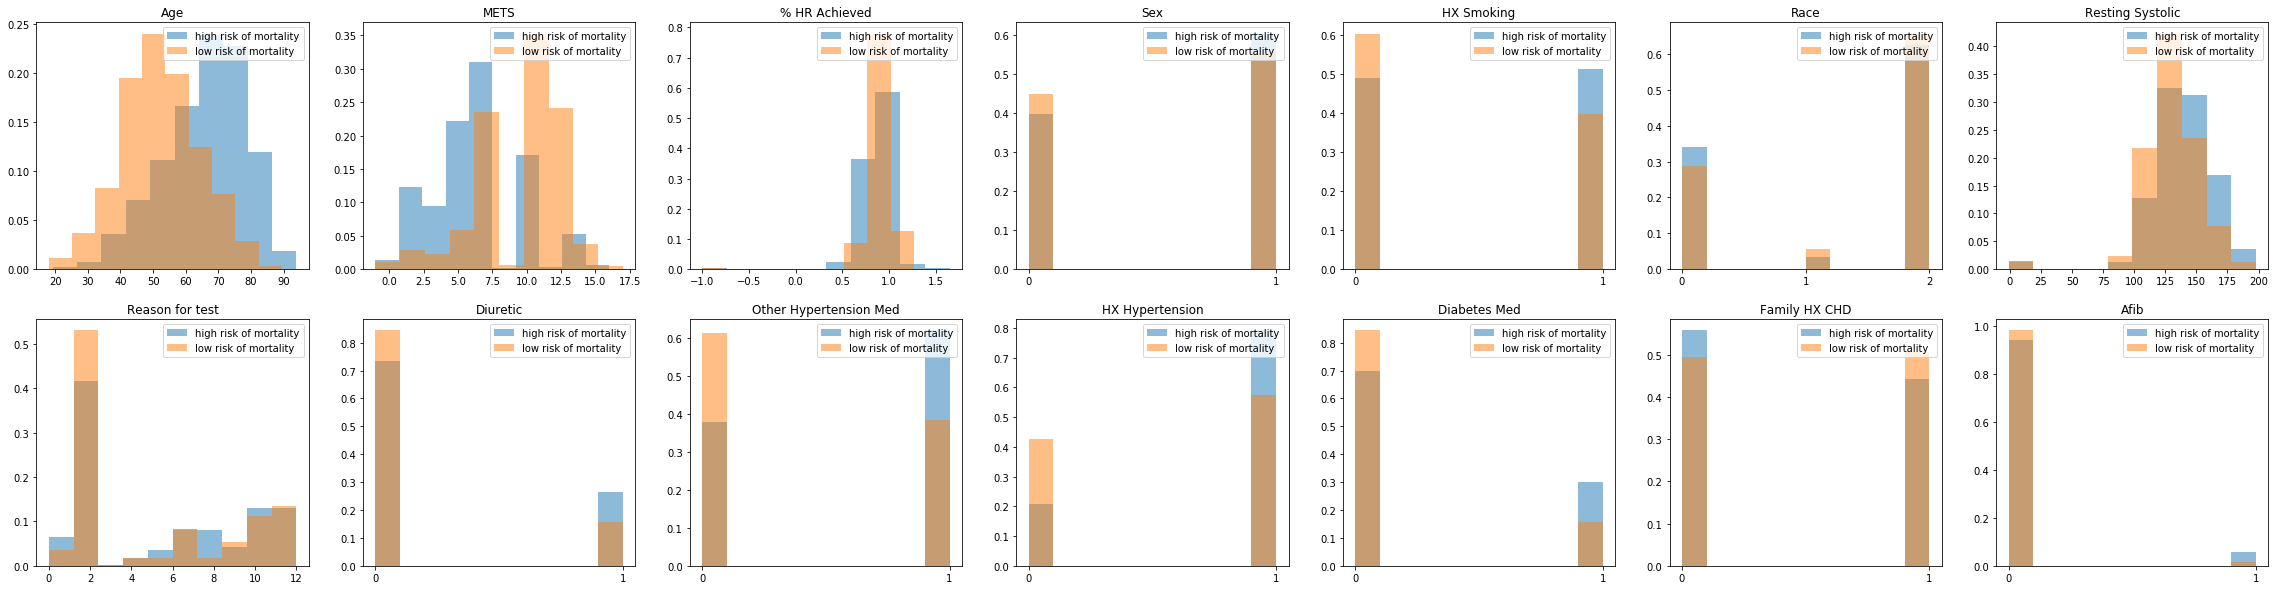

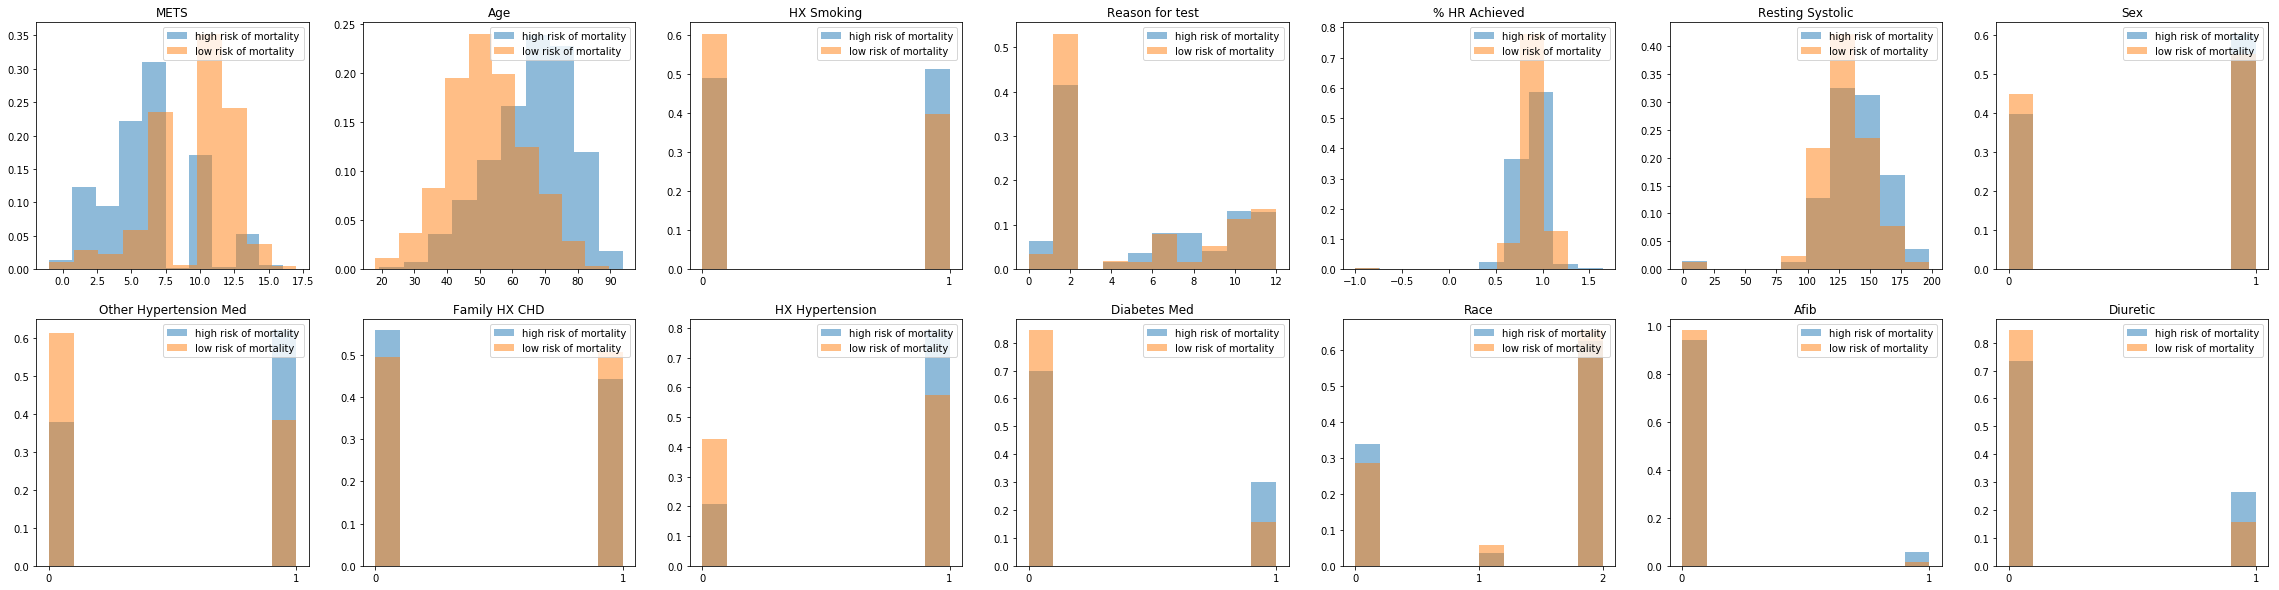

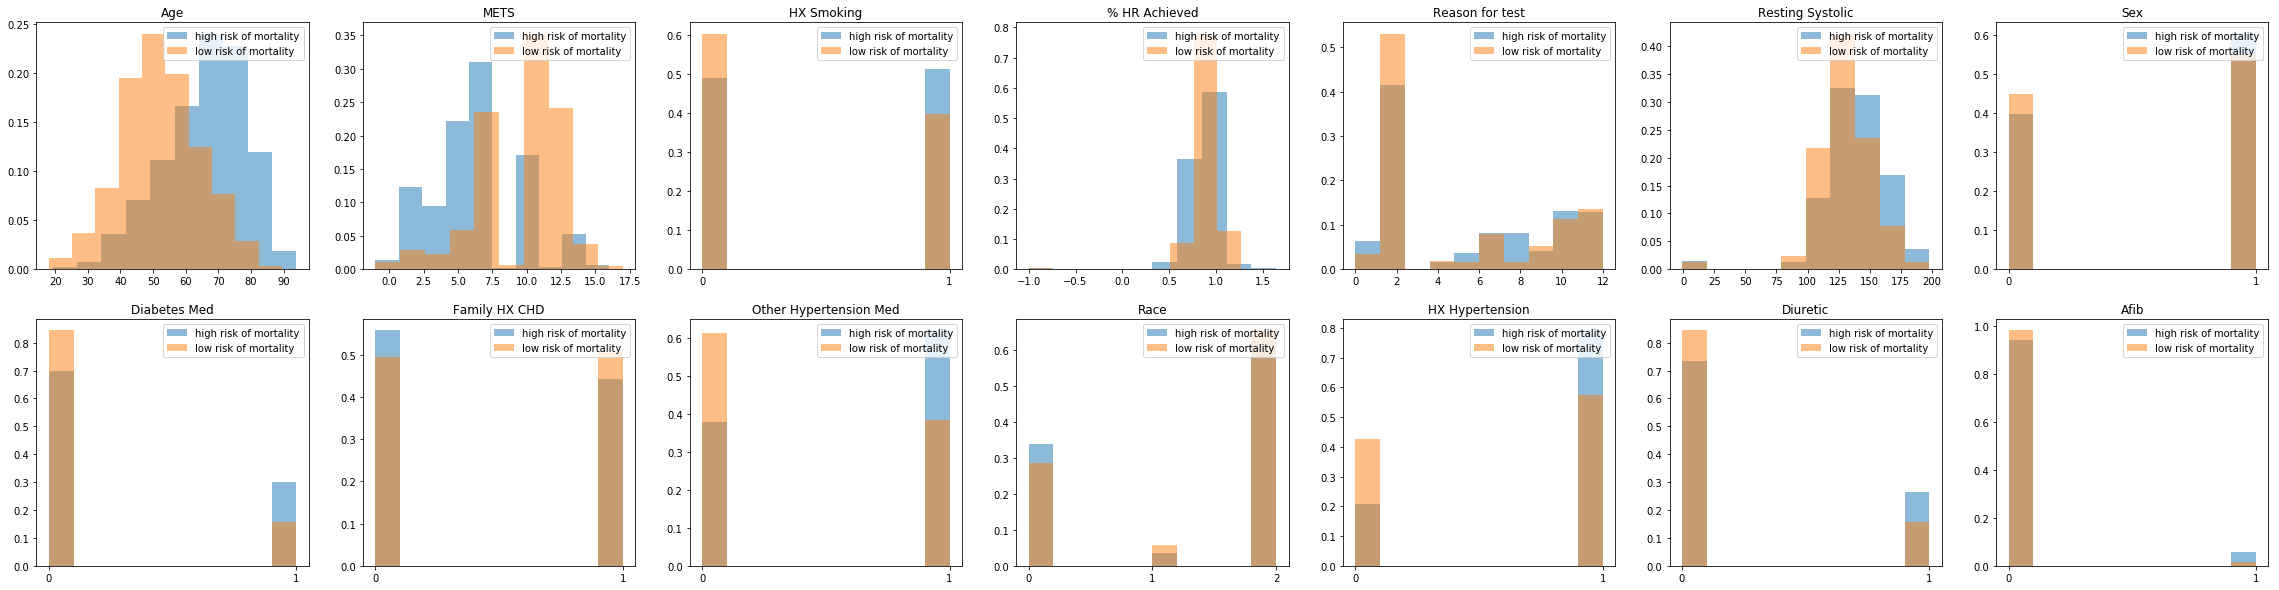

In [34]:
for j in a_dict.keys():
    plt.figure(figsize=(40,10))
    for c,i in enumerate(a_dict[j]):
        plt.subplot(2, 7, c+1)
        weighta = np.zeros_like(dataset.train[dead_idx,i]) + 1. / dataset.train[dead_idx,i].shape[0]
        weightb = np.zeros_like(dataset.train[not_idx,i]) + 1. / dataset.train[not_idx,i].shape[0]
        plt.hist(dataset.train[dead_idx,i], alpha=0.5, label='high risk of mortality', align='mid', weights= weighta)
        plt.hist(dataset.train[not_idx,i], alpha=0.5, label='low risk of mortality', align='mid', weights=weightb)
        plt.legend(loc='upper right')
        plt.title(dataset.feature_names[i])
        if np.unique(dataset.train[dead_idx,i]).shape[0] < 5:
            plt.xticks(range(int(min(dataset.train[dead_idx,i])), int(max(dataset.train[dead_idx,i]))+1))
    plt.savefig('figs/'+str(j)+'.png', bbox_inches='tight')
    plt.show()